# Review of classical electronic structure methods 

In order to assess the performance of quantum computing algorithms in addressing the electronic structure problem, we will briefly review a few commonly employed classical electronic structure methods of varying level of approximation. 

## Hartree-Fock

The Hartree-Fock (HF) method employs a **mean-field approximation**, where Coulomb correlation of electrons is neglected. The HF wavefunction is hence restricted to the form of a single Slater determinant, for which the optimal form may be acquired by an optimization of the underlying single particle basis (orbitals). Once the optimal HF orbitals have been found, the HF state may be written as 

$$ | \text{HF} \rangle = \prod_{p \in \text{occ}} \hat a^\dagger_p | \text{vac} \rangle $$

where $\hat a^\dagger_p$ creates an electron in the $p^{\rm{th}}$ optimized HF spin orbital, and  $| \text{vac} \rangle$ is the vacuum state (all spin-orbitals unoccupied). Due to the restriction to a single Slater determinant, the HF energy may be obtained very efficiently and can be applied to very large molecules, however it becomes qualitatively incorrect when **electronic correlations** become sufficiently strong. The HF wavefunction is often used as a starting point in more accurate treatments of electronic correlation. 

## Coupled cluster

The Coupled cluster (CC) method introduces electronic correlation to the wavefunction ansatz by operating on the HF reference state with the exponential of excitation operators

$$|\text{CC} \rangle = e^{\hat T} | \text{HF}\rangle, \quad \hat T = \hat T_1 + \hat T_2 + ...$$

where $\hat T_1 = \sum_{ia} t^{a}_i \hat a^\dagger_a \hat a_i$ are referred to as 'singles', $\hat T_2 = \sum_{ijab} t^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j$ as 'doubles', etc. When the excitation rank is truncated to only singles (S) and doubles (D), $\hat T = \hat T_1 + \hat T_2$, the corresponding ansatz is referred to as CCSD. Since the number of possible single and double excitations for a system of $N$ electrons in $M$ orbitals is polynomial in $M$, one can efficiently solve a system of equations to obtain the optimized CCSD amplitudes. CCSD often gives accurate energies and can be applied to modestly sized chemical systems. However, due to its implementation, it can **violate the variational principle** and give energies lower than the ground state.

## Full Configuration Interaction
The full configuration interaction (FCI) method yields the **exact ground state energy** within a given basis set. The FCI wavefunction is written as a linear combination of all possible $N$-particle Slater determinants over the orbital basis
$$|\text{FCI} \rangle =  \left( \sum_{ia} C^{a}_i \hat a^\dagger_a \hat a_i + \sum_{ijab} C^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j + ...  \right) | \text{HF} \rangle $$
where the sum includes up to $N$-electron excitations, and hence there are an exponential number of coefficients to optimize in $| \text{FCI} \rangle$. Due to its **exponential complexity**, FCI is often reserved for only the smallest chemical systems. However, it serves as a useful result to compare to when assessing tractable electronic structure methods.

# Benchmarking for electronic PESs in minimal basis (STO-3G)

We will apply HF, CCSD, and FCI to obtaining the PESs for a few molecular dissociation processes in minimal (STO-3G) basis.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from utility import get_molecular_data, obtain_PES

basis = 'sto-3g'

## H<sub>4</sub>

In [8]:
#h4 bond lengths
# 15 x evenly spaced numbers between 0.2 and 2.6
bond_lengths = np.linspace(0.2,2.6,15)

In [9]:
#Run FCI
FCI_PES = obtain_PES('h4', bond_lengths, basis, method='fci')

E = 6.908745340360388 Eh
E = 0.8752262813837524 Eh
E = -0.8997663793719841 Eh
E = -1.5639399206270577 Eh
E = -1.8334308574470821 Eh
E = -1.9390183452895857 Eh
E = -1.9694428564439956 Eh
E = -1.9650805611761357 Eh
E = -1.946538243550484 Eh
E = -1.924879559891658 Eh
E = -1.9057257761544402 Eh
E = -1.891197966895457 Eh
E = -1.881281226376649 Eh
E = -1.8749960099801708 Eh
E = -1.871211050316054 Eh


In [11]:
#Run HF
HF_PES = obtain_PES('h4', bond_lengths, basis,  method='hf')

E = 6.965900011489204 Eh
E = 0.9478506995180449 Eh
E = -0.8068051639615472 Eh
E = -1.448857169963647 Eh
E = -1.6955830399245686 Eh
E = -1.7766234978671722 Eh
E = -1.7795029107613831 Eh
E = -1.7440050032297207 Eh
E = -1.6905762022705715 Eh
E = -1.6305352277617091 Eh
E = -1.5703780606930424 Eh
E = -1.5138019107456238 Eh
E = -1.4627315893011266 Eh
E = -1.417928630268607 Eh
E = -1.3794285596117204 Eh


In [13]:
#Run CCSD
CCSD_PES = obtain_PES('h4', bond_lengths, basis,  method='ccsd')

E = 6.911090945212192 Eh
E = 0.8751677221981962 Eh
E = -0.9007298043174926 Eh
E = -1.5655201366301112 Eh
E = -1.8360279247640714 Eh
E = -1.9433062521923565 Eh
E = -1.9762988878821477 Eh
E = -1.975524241728598 Eh
E = -1.9611104090151013 Eh
E = -1.9429084901605798 Eh
E = -1.9253786299262745 Eh
E = -1.910295658498735 Eh
E = -1.898144054138937 Eh
E = -1.888790191533901 Eh
E = -1.8818345935019032 Eh


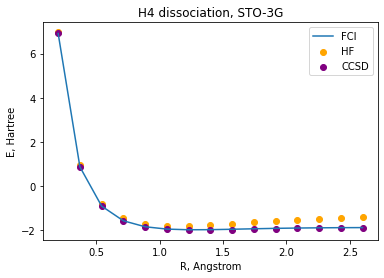

In [14]:
#Plot H4 PESs

plt.title('H4 dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

<img src="figs/testimage.png">

## LiH symmetric O-H dissociation

In [15]:
bond_lengths = np.linspace(0.5,2.7,15)

In [16]:
#Run FCI
FCI_PES = obtain_PES('lih', bond_lengths, basis, method='fci')

E = -7.050225036066596 Eh
E = -7.4336242805082415 Eh
E = -7.649043255824183 Eh
E = -7.769366121819065 Eh
E = -7.834465451980467 Eh
E = -7.867260599272534 Eh
E = -7.880695626775522 Eh
E = -7.882324378871227 Eh
E = -7.876830218403896 Eh
E = -7.867261893022094 Eh
E = -7.855669778443382 Eh
E = -7.8434696409600795 Eh
E = -7.831659737762487 Eh
E = -7.820936743693647 Eh
E = -7.811735339056963 Eh


In [17]:
#Run HF
HF_PES = obtain_PES('lih', bond_lengths, basis,  method='hf')

E = -7.028471753591773 Eh
E = -7.414319733571757 Eh
E = -7.630830781019033 Eh
E = -7.752204460813813 Eh
E = -7.817777869269737 Eh
E = -7.850229846807039 Eh
E = -7.862441361415257 Eh
E = -7.861950402903108 Eh
E = -7.853411357232773 Eh
E = -7.839814814258771 Eh
E = -7.823123814855577 Eh
E = -7.8046459125573975 Eh
E = -7.78527132785335 Eh
E = -7.765631044232423 Eh
E = -7.746198175823736 Eh


In [18]:
#Run CCSD
CCSD_PES = obtain_PES('lih', bond_lengths, basis,  method='ccsd')

E = -7.050156294294404 Eh
E = -7.433610841372507 Eh
E = -7.649036617768134 Eh
E = -7.769359700452726 Eh
E = -7.834458480093516 Eh
E = -7.867252454615897 Eh
E = -7.880685601025597 Eh
E = -7.882312097529629 Eh
E = -7.8768157094479845 Eh
E = -7.86724495720612 Eh
E = -7.855649640068277 Eh
E = -7.843444870656926 Eh
E = -7.831628232994092 Eh
E = -7.820895891600326 Eh
E = -7.811682577240466 Eh


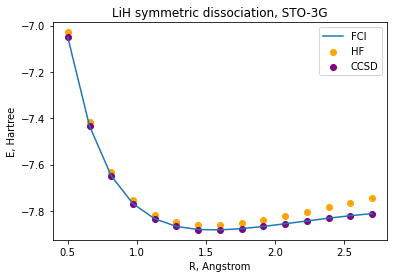

In [19]:
#Plot LiH PESs

plt.title('LiH symmetric dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()